In [1]:
# import libraries
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras import backend as K
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# batch, classes, epochs
batch_size = 128
num_classes = 10
epochs = 25

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

input_shape = (x_train.shape[1:] + (1,)) # (28, 28, 1)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


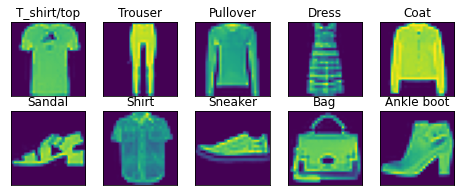

In [4]:
# plotting some random 10 images
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [5]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = Sequential()

# first CONV => RELU => CONV => RELU => POOL layer => Dropout
model.add(Conv2D(32, (3, 3), input_shape = input_shape, kernel_initializer='he_normal'))
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer => Dropout
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation = 'softmax'))

In [10]:
# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)       

In [11]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# convert to float, normalise the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [13]:
# train 
history = model.fit(np.expand_dims(x_train, -1), y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.3,
              shuffle=True)

Epoch 1/25
329/329 [==============================] - 155s 473ms/step - loss: 0.7346 - accuracy: 0.7274 - val_loss: 0.5854 - val_accuracy: 0.7819
Epoch 2/25
329/329 [==============================] - 155s 471ms/step - loss: 0.6454 - accuracy: 0.7598 - val_loss: 0.5855 - val_accuracy: 0.7772
Epoch 3/25
329/329 [==============================] - 155s 471ms/step - loss: 0.6030 - accuracy: 0.7763 - val_loss: 0.5199 - val_accuracy: 0.8014
Epoch 4/25
329/329 [==============================] - 156s 473ms/step - loss: 0.5649 - accuracy: 0.7905 - val_loss: 0.4820 - val_accuracy: 0.8218
Epoch 5/25
329/329 [==============================] - 156s 474ms/step - loss: 0.5429 - accuracy: 0.8004 - val_loss: 0.4636 - val_accuracy: 0.8331
Epoch 6/25
329/329 [==============================] - 157s 477ms/step - loss: 0.5204 - accuracy: 0.8092 - val_loss: 0.4576 - val_accuracy: 0.8304
Epoch 7/25
329/329 [==============================] - 157s 477ms/step - loss: 0.5055 - accuracy: 0.8147 - val_loss: 0.4341 -

313/313 [==============================] - 9s 29ms/step - loss: 0.3480 - accuracy: 0.8703
Test Accuracy : 0.870


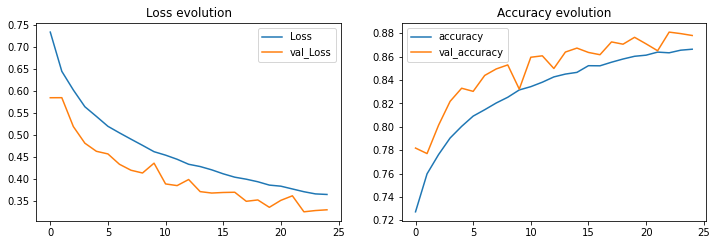

In [14]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

evaluation = model.evaluate(np.expand_dims(x_test, -1), y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

TypeError: ignored

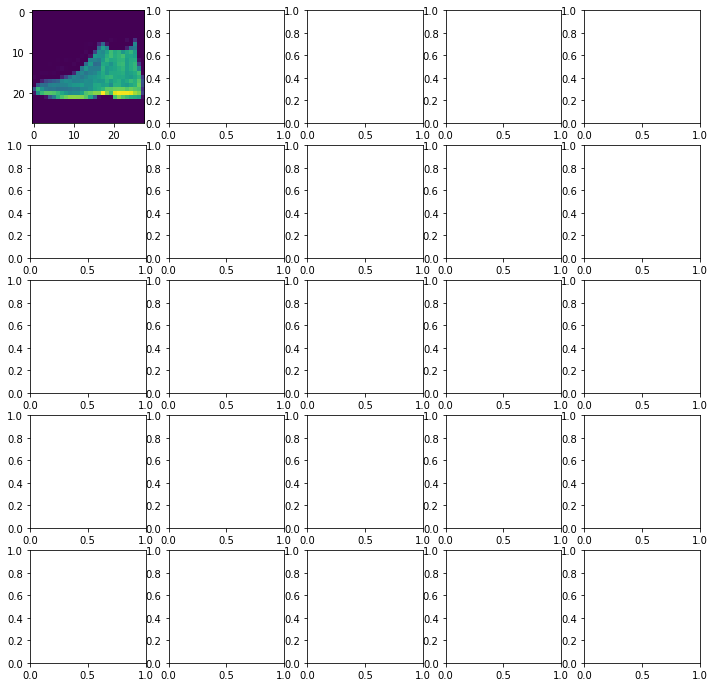

In [23]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
predicted_classes = model.predict_classes(np.expand_dims(x_test, -1))

nex = np.expand_dims(x_test, -1)

for i in np.arange(0, L * W):  
    axes[i].imshow(nex[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [20]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]
predicted_classes = model.predict_classes(np.expand_dims(x_test, -1))
print(classification_report(y_test, predicted_classes, target_names = target_names))


ValueError: ignored

Result: After 50 epochs, the difference between training and validation accuracy is low but the training is slow as compared to the model with batch normalization.